# Computational Intelligence: Sentiment Analysis on Twitter dataset 

- Musab Rasheed-19030008

In this Notebook, I have implemented various classical machine learning models so called Discriminative models. The aim is to classify the text into Positive and Negative classes. 

In [ ]:
# Imports
import pandas as pd 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
import seaborn as sns
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

## Step 1 | Loading Dataset


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])
data.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data.drop(['date','query','user'], axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data['text'] = data['text'].astype('str')
data.head()

,polarity,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


## Step 2 | Preprocessing

In [ ]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))




In [ ]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))

urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

data.head()

Text Preprocessing complete.


In [ ]:
X = data['processed_tweets'].values
y = data['polarity'].values


## Model Engineering

### **1. TfidfVectorizer** 


In [ ]:
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1280000, 762358)
y_train (1280000,)

X_test (320000, 762358)
y_test (320000,)


In [ ]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### **2. Logistic Regression**

Accuracy of model on training data : 82.343203125
Accuracy of model on testing data : 78.7259375 

              precision    recall  f1-score   support

           0       0.80      0.76      0.78    160156
           4       0.77      0.81      0.79    159844

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



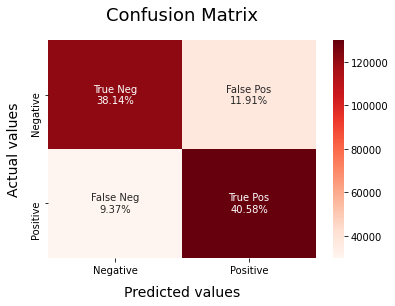

In [ ]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

### 3. **Linear SVM**
A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they're able to categorize new text. 

Accuracy of model on training data : 89.16296875
Accuracy of model on testing data : 77.90718749999999 

              precision    recall  f1-score   support

           0       0.79      0.76      0.78    160156
           4       0.77      0.80      0.78    159844

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



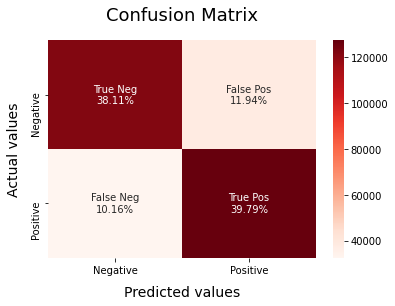

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

### **4. Random Forest**

Accuracy of model on training data : 70.308125
Accuracy of model on testing data : 69.10062500000001 

              precision    recall  f1-score   support

           0       0.74      0.58      0.65    160156
           4       0.66      0.80      0.72    159844

    accuracy                           0.69    320000
   macro avg       0.70      0.69      0.69    320000
weighted avg       0.70      0.69      0.69    320000



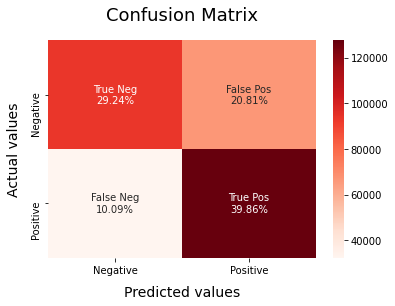

In [ ]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

### **5. Naive Bayes**

Accuracy of model on training data : 83.86984375
Accuracy of model on testing data : 77.44250000000001 

              precision    recall  f1-score   support

           0       0.77      0.79      0.78    160156
           4       0.78      0.76      0.77    159844

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



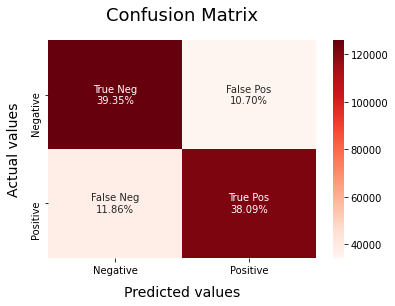

In [ ]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

### **6. LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import re

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.processed_tweets)
sequences = tokenizer.texts_to_sequences(data.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)

[[   0    0    0 ...  759 1865    2]
 [   0    0    0 ...   11  187 1283]
 [   0    0    0 ...  368    6 3132]
 ...
 [   0    0    0 ...  123  504 1746]
 [   0    0    0 ...  415 4997   12]
 [   0    0    0 ...    0    0  458]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=1)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/10
16684/40000 [===========>..................] - ETA: 52:38 - loss: -968621.3717 - accuracy: 0.0682